# Final Project: Data processing

## Initial Data Intake

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import os

# Read in data
DATA_PATH = "/content/drive/MyDrive/DATASCI 207/Final Project/NBA data - raw"

In [8]:
# Function to loop through directories to read in files
def load_data(path_to_data):
    '''Load datasets
    Parameters:
    path_to_data (str): This is the path to data

    Returns:
    nba_data: A pandas dataframe
    '''
    # List all folders in data directory
    dir_list = os.listdir(path_to_data)

    # Initialize data
    nba_dfs = []
    vegas_dfs = []

    # Loop through NBA files
    for dir in dir_list:
      df = pd.read_csv(os.path.join(path_to_data, dir, "raw_scores.txt"),
                       delimiter=',', skiprows=[0], header=None)
      nba_dfs.append(df)

    # Loop through Vegas files
    for dir in dir_list:
      df = pd.read_csv(os.path.join(path_to_data, dir, "vegas.txt"),
                       delimiter=',')
      vegas_dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    nba_df = pd.concat(nba_dfs, ignore_index=True)
    vegas_df = pd.concat(vegas_dfs, ignore_index=True)

    # Name columns
    nba_df.columns = ["game_date", "game_sequence","game_id","team_id","team_abbr",
                      "team_city","game_result","pts_q1","pts_q2","pts_q3",
                      "pts_q4","pts_ot1","pts_ot2","pts_ot3","pts_ot4","pts_ot5",
                      "pts_ot6","pts_ot7","pts_ot8","pts_ot9","pts_ot10","pts_tot",
                      "fg_pct","ft_pct","fg3_pct","ast","reb","tov"]

    return nba_df, vegas_df

In [9]:
# Load data
nba_df, vegas_df = load_data(DATA_PATH)

## Pre-processing

In [10]:
# Some OT columns have no info
nba_df[['pts_ot5', 'pts_ot6', 'pts_ot7', 'pts_ot8', 'pts_ot9', 'pts_ot10']].describe()

# Drop OT columns
nba_df = nba_df.drop(['pts_ot5', 'pts_ot6', 'pts_ot7', 'pts_ot8', 'pts_ot9', 'pts_ot10'], axis=1)

In [22]:
# Show NBA columns
nba_df.columns

Index(['game_date', 'game_sequence', 'game_id', 'team_id', 'team_abbr',
       'team_city', 'game_result', 'pts_q1', 'pts_q2', 'pts_q3', 'pts_q4',
       'pts_ot1', 'pts_ot2', 'pts_ot3', 'pts_ot4', 'pts_tot', 'fg_pct',
       'ft_pct', 'fg3_pct', 'ast', 'reb', 'tov'],
      dtype='object')

In [20]:
# Show Vegas columns
vegas_df.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML',
       'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_Line_ML',
       'Best_Line_ML', 'Worst_Line_ML', 'PercentBet_Spread',
       'Open_Line_Spread', 'Open_Odds_Spread', 'Pinnacle_Line_Spread',
       'Pinnacle_Odds_Spread', '5dimes_Line_Spread', '5dimes_Odds_Spread',
       'Heritage_Line_Spread', 'Heritage_Odds_Spread', 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Betonline_Line_Spread', 'Betonline_Odds_Spread',
       'Average_Line_Spread', 'Average_Odds_Spread', 'Best_Line_Spread',
       'Worst_Line_Spread', 'Best_Odds_Spread', 'Worst_Odds_Spread',
       'PercentBet_OU', 'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU',
       'Pinnacle_Odds_OU', '5dimes_Line_OU', '5dimes_Odds_OU',
       'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
       'Average_Line

In [23]:
# Select desired Vegas columns
vegas_df = vegas_df[['Location', 'TeamId', 'GameId', 'Average_Line_Spread', 'Spread', 'Result']]
vegas_df.columns = ['location', 'team_id', 'game_id', 'vegas_spread', 'spread', 'result']

# Merge data
combined_df = pd.merge(nba_df, vegas_df, on=['team_id', 'game_id'], how='left')

In [25]:
# Dimensions
print("Combined shape:", combined_df.shape)
print("NBA data shape:", nba_df.shape)
print("Vegas data shape:", vegas_df.shape)

Combined shape: (17226, 26)
NBA data shape: (17226, 22)
Vegas data shape: (17208, 6)


In [26]:
# Inspect games without spread
combined_df[combined_df['vegas_spread'].isna()]

KeyError: 'vegas_spread'

## EDA

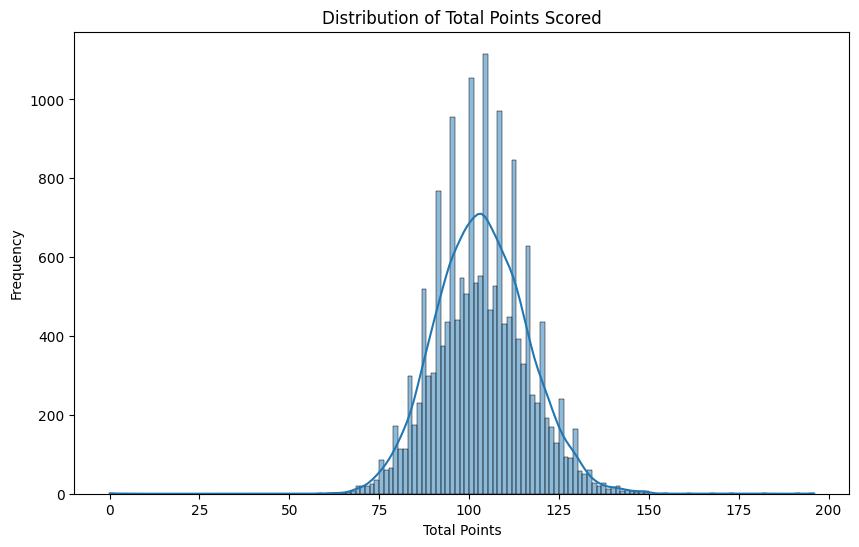

In [12]:
# Distribution of total points scored
plt.figure(figsize=(10, 6))
sns.histplot(nba_df['pts_tot'], kde=True)
plt.title('Distribution of Total Points Scored')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()

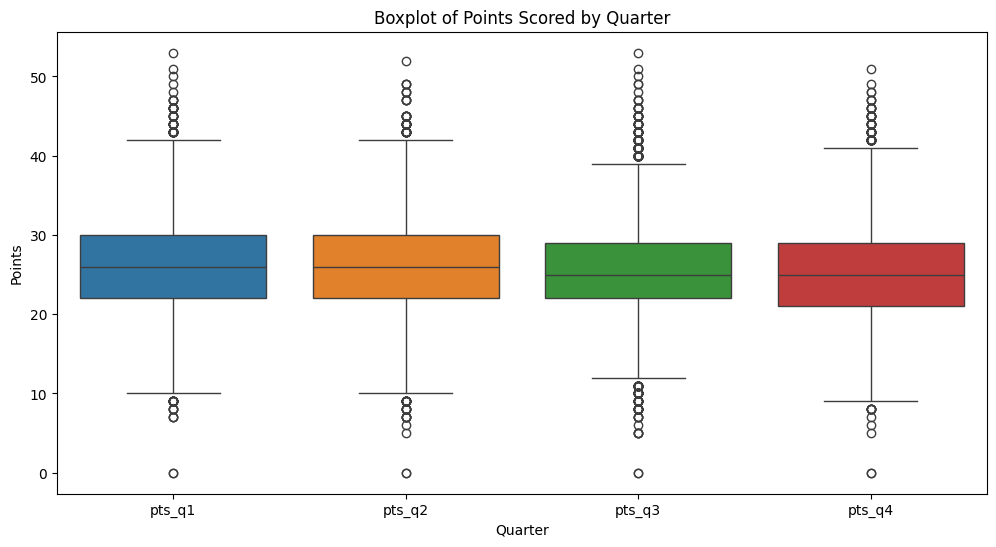

In [13]:
# Boxplot of points scored by each quarter
plt.figure(figsize=(12, 6))
sns.boxplot(data=nba_df[['pts_q1', 'pts_q2', 'pts_q3', 'pts_q4']])
plt.title('Boxplot of Points Scored by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Points')
plt.show()

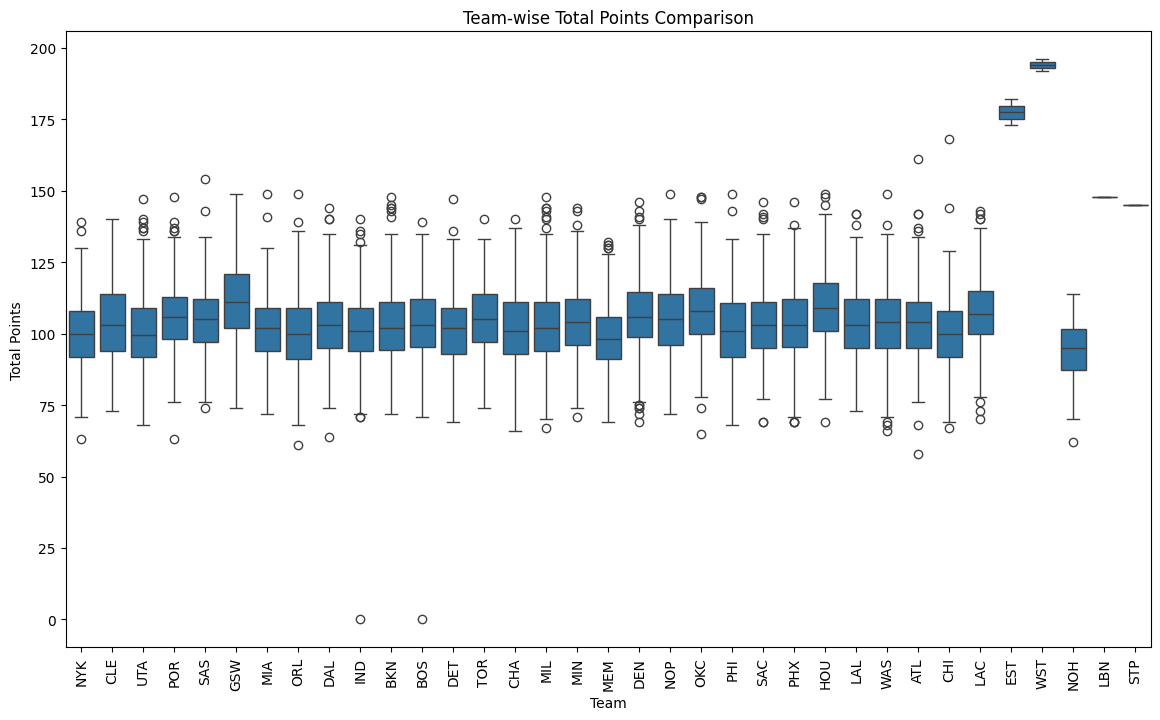

In [14]:
# Team-wise points comparison
plt.figure(figsize=(14, 8))
sns.boxplot(x='team_abbr', y='pts_tot', data=nba_df)
plt.title('Team-wise Total Points Comparison')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation=90)
plt.show()

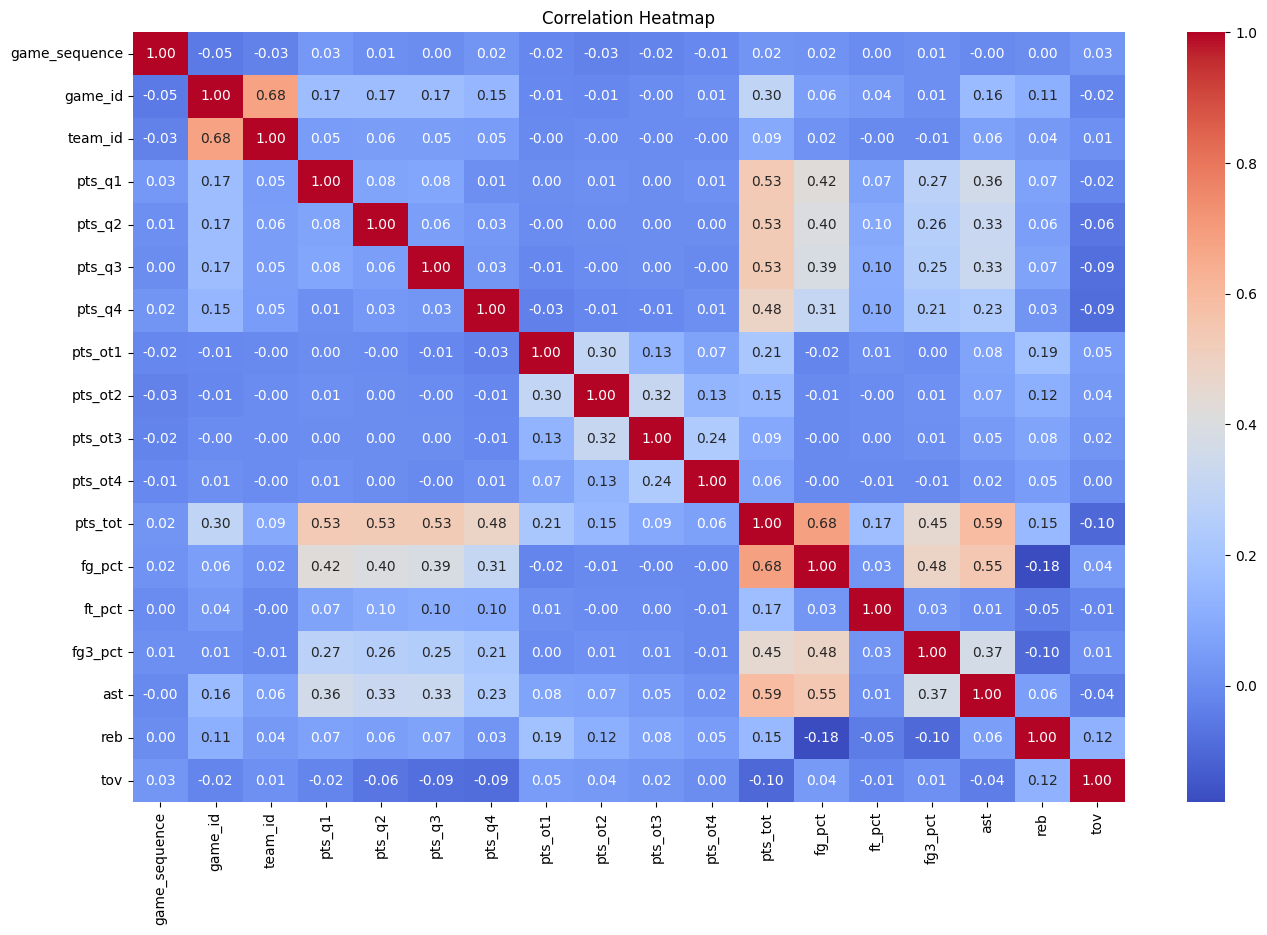

In [15]:
# Correlation heatmap
plt.figure(figsize=(16, 10))
numeric_cols = nba_df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(nba_df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

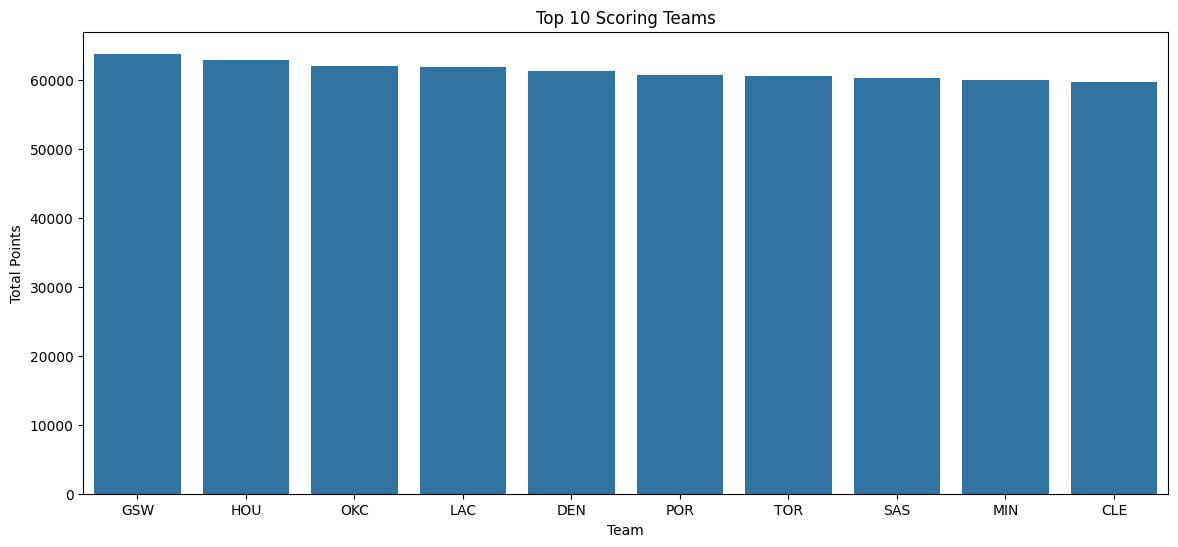

In [16]:
# Top scoring teams
top_teams = nba_df.groupby('team_abbr')['pts_tot'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.title('Top 10 Scoring Teams')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.show()

In [17]:
# Boxplot of points for winning and losing teams
plt.figure(figsize=(12, 6))
sns.boxplot(x='win_loss', y='pts_tot', data=nba_df)
plt.title('Points Distribution for Winning and Losing Teams')
plt.xlabel('Win/Loss')
plt.ylabel('Total Points')
plt.show()

ValueError: Could not interpret value `win_loss` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Scatter plot of assists vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ast', y='pts_tot', data=nba_df)
plt.title('Assists vs. Total Points')
plt.xlabel('Assists')
plt.ylabel('Total Points')
plt.show()

In [ ]:
# Scatter plot of rebounds vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reb', y='pts_tot', data=nba_df)
plt.title('Rebounds vs. Total Points')
plt.xlabel('Rebounds')
plt.ylabel('Total Points')
plt.show()